<a href="https://colab.research.google.com/github/Shubhi-1/Covid-19-Analysis/blob/main/Covid19_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title
#pip install plotly_express==0.4.0

In [ ]:
#@title
#import plotly_express as px

In [ ]:
#@title
import pandas as pd
import numpy as np
import datetime
import requests
import warnings

import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates
import seaborn as sns
import plotly.offline as py
from matplotlib.dates import drange

from IPython.display import Image
warnings.filterwarnings('ignore')
%matplotlib inline

age_details = pd.read_csv('AgeGroupDetails.csv')
india_covid_19 = pd.read_csv('covid_19_india.csv')
hospital_beds = pd.read_csv('HospitalBedsIndia.csv')
individual_details = pd.read_csv('IndividualDetails.csv')
ICMR_details = pd.read_csv('ICMRTestingDetails.csv')
ICMR_labs = pd.read_csv('ICMRTestingLabs.csv')
state_testing = pd.read_csv('StatewiseTestingDetails.csv')
population = pd.read_csv('population_india_census2011.csv')

world_population = pd.read_csv('population_by_country_2020.csv')
confirmed_df = pd.read_csv('time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('time_series_covid19_deaths_global.csv')
recovered_df = pd.read_csv('time_series_covid19_recovered_global.csv')
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-04-2020.csv')

india_covid_19['Date'] = pd.to_datetime(india_covid_19['Date'],dayfirst = True)
state_testing['Date'] = pd.to_datetime(state_testing['Date'])
ICMR_details['DateTime'] = pd.to_datetime(ICMR_details['DateTime'],dayfirst = True)
ICMR_details = ICMR_details.dropna(subset=['TotalSamplesTested', 'TotalPositiveCases'])

# **The Story of Covid-19 in India**

## - Shubhi Gupta

# **Age Group Analysis**

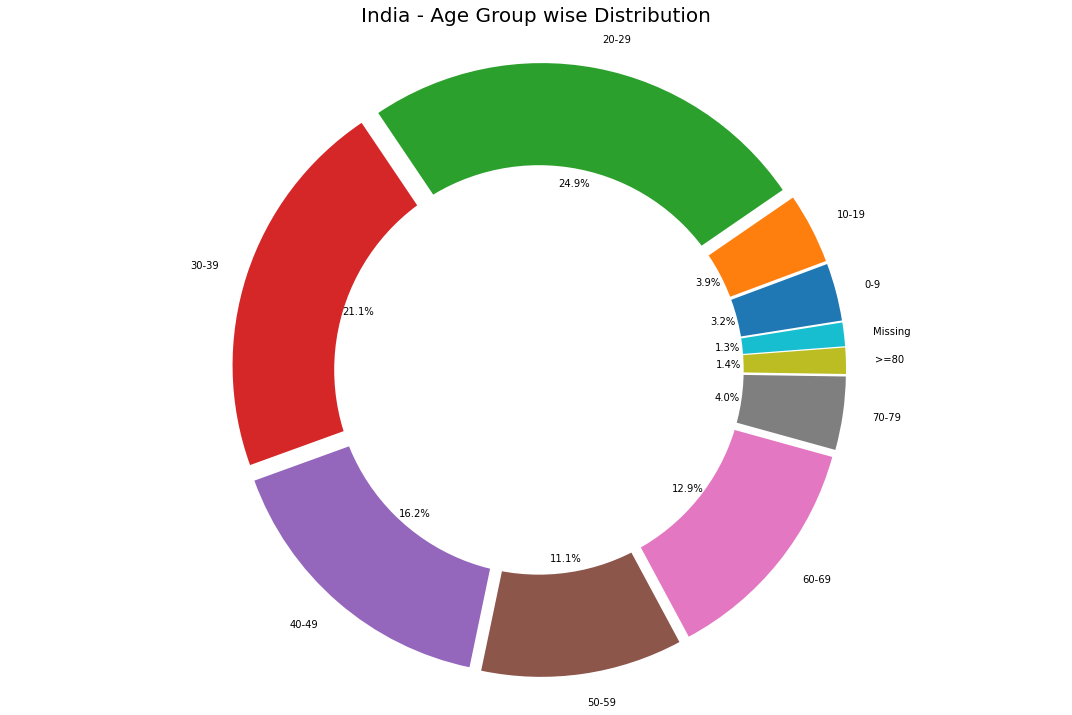

In [ ]:
#@title
labels = list(age_details['AgeGroup'])
sizes = list(age_details['TotalCases'])

explode = []

for i in labels:
    explode.append(0.05)
    
plt.figure(figsize= (15,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=9, explode =explode)
centre_circle = plt.Circle((0,0),0.70,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('India - Age Group wise Distribution',fontsize = 20)
plt.axis('equal')  
plt.tight_layout()


*   Age group 20-29 is the most affected.
*   Middle aged people were more exposed to the virus compared to people of ages >60. 
*   The prime reason could be that the middle aged people are out of their houses due to work, while young kids and old people remain at home for most part of their day.
---



# **Gender Analysis**

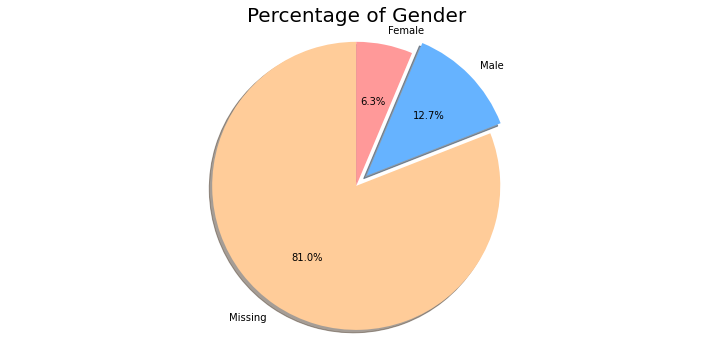

In [ ]:
#@title
labels = ['Missing', 'Male', 'Female']
sizes = []
sizes.append(individual_details['gender'].isnull().sum())
sizes.append(list(individual_details['gender'].value_counts())[0])
sizes.append(list(individual_details['gender'].value_counts())[1])

explode = (0, 0.1, 0)
colors = ['#ffcc99','#66b3ff','#ff9999']

plt.figure(figsize= (10,5))
plt.title('Percentage of Gender',fontsize = 20)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',shadow=True, startangle=90)
plt.axis('equal')
plt.tight_layout()

**80% of the patients gender information is missing. So we analyse with remaining the data.

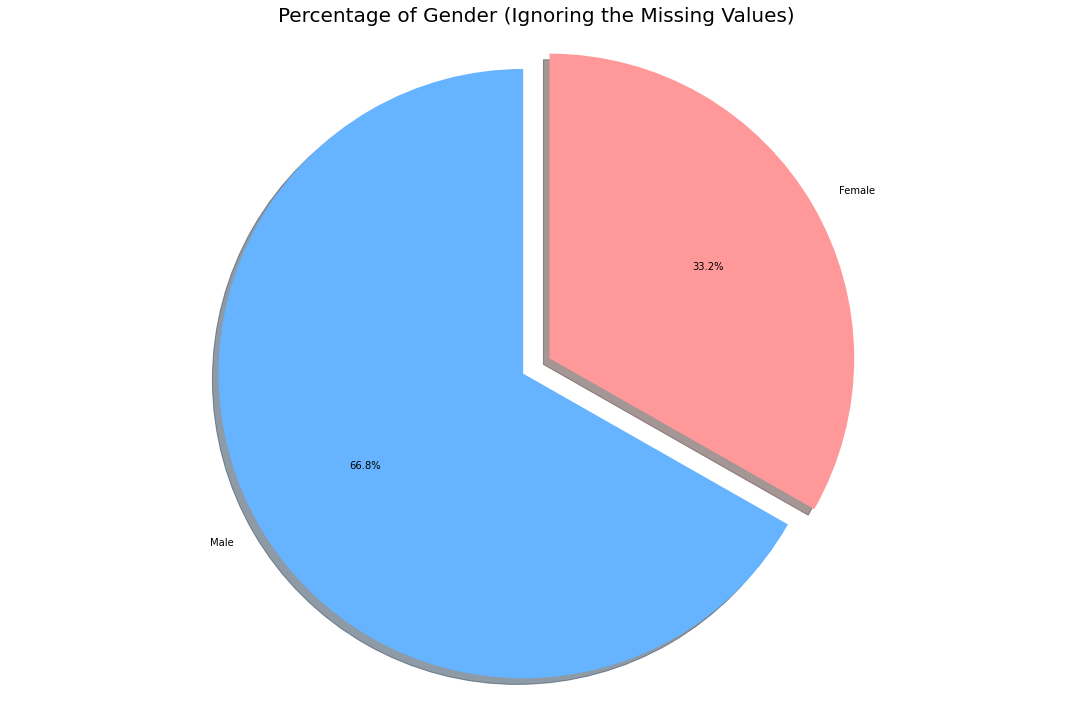

In [ ]:
#@title
labels = ['Male', 'Female']
sizes = []
sizes.append(list(individual_details['gender'].value_counts())[0])
sizes.append(list(individual_details['gender'].value_counts())[1])

explode = (0.1, 0)
colors = ['#66b3ff','#ff9999']

plt.figure(figsize= (15,10))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.title('Percentage of Gender (Ignoring the Missing Values)',fontsize = 20)
plt.axis('equal')
plt.tight_layout()


*   Almost two third of the known cases were males, a third of the population was female.
*  80% of the data was missing.


---



In [ ]:
#@title
dates = list(confirmed_df.columns[4:])
dates = list(pd.to_datetime(dates))
dates_india1 = dates[8:63]

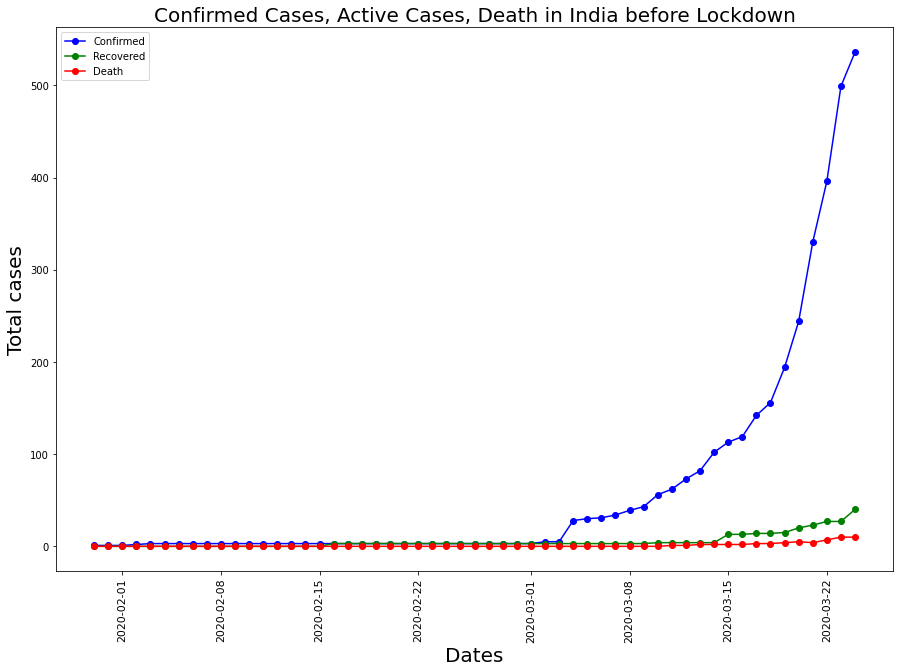

In [ ]:
#@title
df1 = confirmed_df.groupby('Country/Region').sum().reset_index()
df2 = deaths_df.groupby('Country/Region').sum().reset_index()
df3 = recovered_df.groupby('Country/Region').sum().reset_index()

k = df1[df1['Country/Region']=='India'].loc[:,'1/30/20':'3/24/20']
india_confirmed = k.values.tolist()[0] 

k = df2[df2['Country/Region']=='India'].loc[:,'1/30/20':'3/24/20']
india_deaths = k.values.tolist()[0] 

k = df3[df3['Country/Region']=='India'].loc[:,'1/30/20':'3/24/20']
india_recovered = k.values.tolist()[0] 

plt.figure(figsize= (15,10))
plt.xticks(rotation = 90 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Confirmed Cases, Active Cases, Death in India before Lockdown" , fontsize = 20)

ax1 = plt.plot_date(y= india_confirmed,x= dates_india1,label = 'Confirmed',linestyle ='-',color = 'b')
ax2 = plt.plot_date(y= india_recovered,x= dates_india1,label = 'Recovered',linestyle ='-',color = 'g')
ax3 = plt.plot_date(y= india_deaths,x= dates_india1,label = 'Death',linestyle ='-',color = 'r')
plt.legend();




*   After the first case of Covid19 on 30th January 2020, the cases rose slowly till March but then increased exponentially after that.
*   First death occurred in mid March.


---



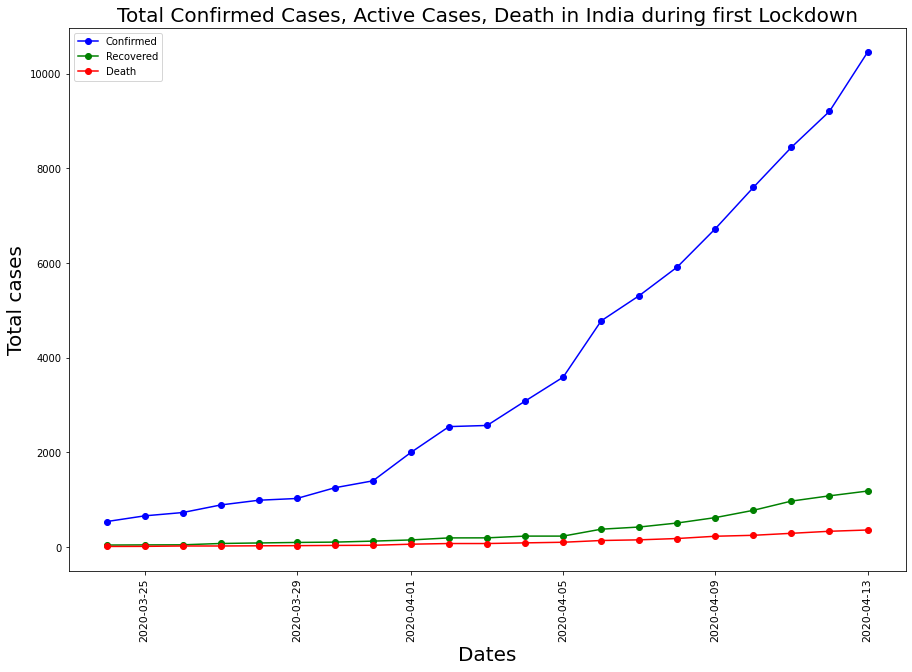

In [ ]:
#@title
dates_india2 = dates[62:83]
df1 = confirmed_df.groupby('Country/Region').sum().reset_index()
df2 = deaths_df.groupby('Country/Region').sum().reset_index()
df3 = recovered_df.groupby('Country/Region').sum().reset_index()

k = df1[df1['Country/Region']=='India'].loc[:,'3/24/20':'4/13/20']
india_confirmed = k.values.tolist()[0] 

k = df2[df2['Country/Region']=='India'].loc[:,'3/24/20':'4/13/20']
india_deaths = k.values.tolist()[0] 

k = df3[df3['Country/Region']=='India'].loc[:,'3/24/20':'4/13/20']
india_recovered = k.values.tolist()[0] 

plt.figure(figsize= (15,10))
plt.xticks(rotation = 90 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Total Confirmed Cases, Active Cases, Death in India during first Lockdown" , fontsize = 20)

ax1 = plt.plot_date(y= india_confirmed,x= dates_india2,label = 'Confirmed',linestyle ='-',color = 'b')
ax2 = plt.plot_date(y= india_recovered,x= dates_india2,label = 'Recovered',linestyle ='-',color = 'g')
ax3 = plt.plot_date(y= india_deaths,x= dates_india2,label = 'Death',linestyle ='-',color = 'r')
plt.legend();



*   First Lockdown was announced on 24th March 2020 for 21 days.
*   In the interval of 3 weeks, cases rose from 600 to 10000.

*   Despite the lockdown, active cases were increasing.
*   The reason might be the sudden panic, lack of awareness, denial to follow the rules, etc.

---







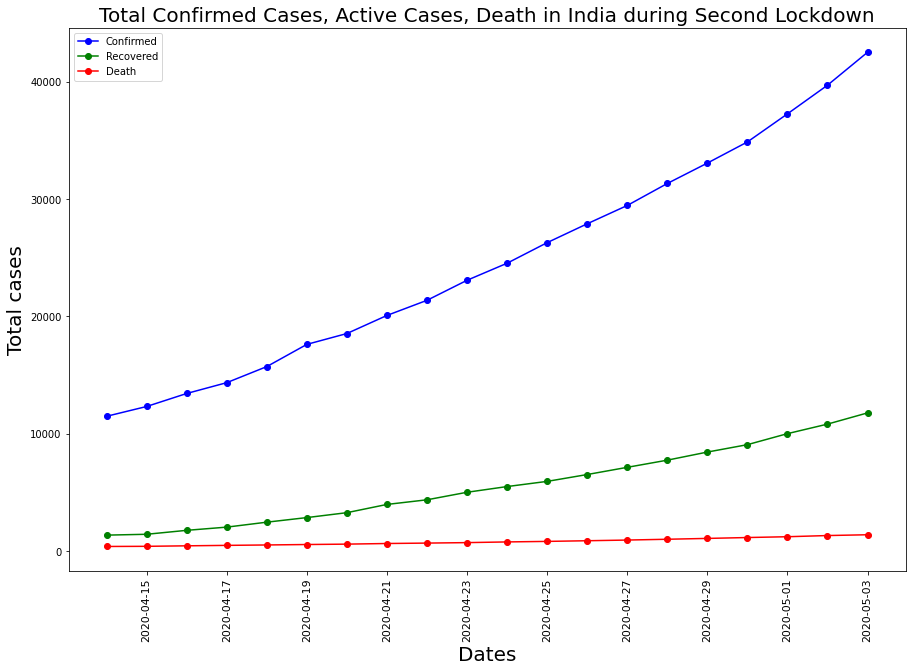

In [ ]:
#@title
dates_india3 = dates[83:103]

df1 = confirmed_df.groupby('Country/Region').sum().reset_index()
df2 = deaths_df.groupby('Country/Region').sum().reset_index()
df3 = recovered_df.groupby('Country/Region').sum().reset_index()

k = df1[df1['Country/Region']=='India'].loc[:,'4/14/20':'5/3/20']
india_confirmed = k.values.tolist()[0] 

k = df2[df2['Country/Region']=='India'].loc[:,'4/14/20':'5/3/20']
india_deaths = k.values.tolist()[0] 

k = df3[df3['Country/Region']=='India'].loc[:,'4/14/20':'5/3/20']
india_recovered = k.values.tolist()[0] 

plt.figure(figsize= (15,10))
plt.xticks(rotation = 90 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Total Confirmed Cases, Active Cases, Death in India during Second Lockdown" , fontsize = 20)

ax1 = plt.plot_date(y= india_confirmed,x= dates_india3,label = 'Confirmed',linestyle ='-',color = 'b')
ax2 = plt.plot_date(y= india_recovered,x= dates_india3,label = 'Recovered',linestyle ='-',color = 'g')
ax3 = plt.plot_date(y= india_deaths,x= dates_india3,label = 'Death',linestyle ='-',color = 'r')
plt.legend();



*   In the duration of second lockdown, the active cases rose from 10000 to around 40000.
*   Recovering rate was close to 25% by the end of Lockdown 2.0

---





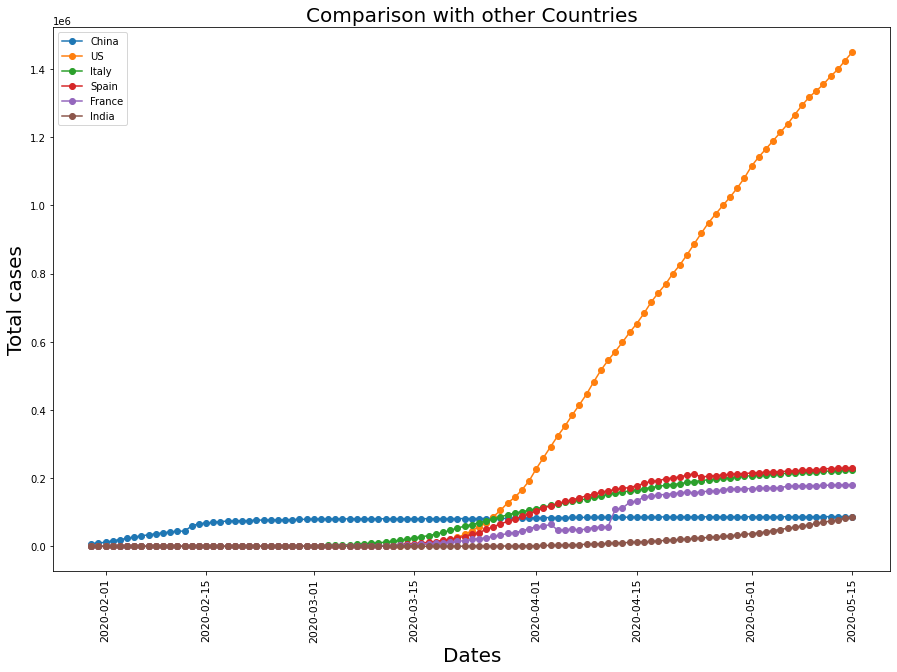

In [ ]:
#@title
dates_india = dates[8:115]
countries = ['China','US', 'Italy', 'Spain', 'France','India']

global_confirmed = []
global_recovered = []
global_deaths = []
global_active = []

for country in countries:
    k =df1[df1['Country/Region'] == country].loc[:,'1/30/20':'5/15/20']
    global_confirmed.append(k.values.tolist()[0]) 

    k =df2[df2['Country/Region'] == country].loc[:,'1/30/20':'5/15/20']
    global_deaths.append(k.values.tolist()[0]) 

    k =df3[df3['Country/Region'] == country].loc[:,'1/30/20':'5/15/20']
    global_deaths.append(k.values.tolist()[0])  

plt.figure(figsize= (15,10))
plt.xticks(rotation = 90 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Comparison with other Countries" , fontsize = 20)

for i in range(len(countries)):
    plt.plot_date(y= global_confirmed[i],x= dates_india,label = countries[i],linestyle ='-')
plt.legend();

*   Initially China had higher number of cases.
*   In the second half of March cases skyrocketed in US.
*   Italy and Spain had relatively same number of cases from January to May 2020.
*   Somewhere around mid February China got the spread of virus under control.

*   By the end of May India and China had reached almost same number of active cases.

---



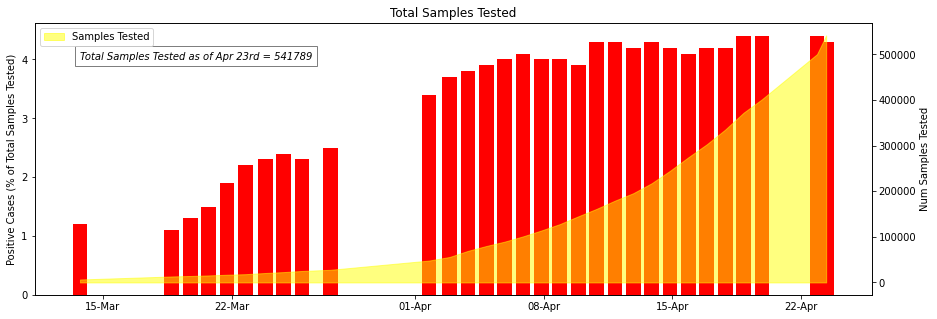

In [ ]:
#@title
ICMR_details['Percent_positive'] = round((ICMR_details['TotalPositiveCases']/ICMR_details['TotalSamplesTested'])*100,1)

fig, ax1 = plt.subplots(figsize= (15,5))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
ax1.set_ylabel('Positive Cases (% of Total Samples Tested)')
ax1.bar(ICMR_details['DateTime'] , ICMR_details['Percent_positive'], color="red",label = 'Percentage of Positive Cases')
ax1.text(ICMR_details['DateTime'][0],4, 'Total Samples Tested as of Apr 23rd = 541789', style='italic',fontsize= 10,
        bbox={'facecolor': 'white' ,'alpha': 0.5, 'pad': 5})

ax2 = ax1.twinx()  
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
ax2.set_ylabel('Num Samples Tested')
ax2.fill_between(ICMR_details['DateTime'],ICMR_details['TotalSamplesTested'],color = 'yellow',alpha = 0.5,label = 'Samples Tested');

plt.legend(loc="upper left")
plt.title('Total Samples Tested')
plt.show()



*   Number of samples tested increased exponentially due to quick government actions.
*   Percentage of positive cases was between 1 to 2.5% till end of March.

*   Blank space in the plot may signify missing data.
*   Throughout April rate of cases was somewhat stable between 3.5%-4%.


---






# **Statewise Analysis**

In [ ]:
#@title
state_cases = india_covid_19.groupby('State/UnionTerritory')['Confirmed','Deaths','Cured'].max().reset_index()

#state_cases = state_cases.astype({'Deaths': 'int'})
state_cases['Active'] = state_cases['Confirmed'] - (state_cases['Deaths']+state_cases['Cured'])
state_cases["Death Rate (per 100)"] = np.round(100*state_cases["Deaths"]/state_cases["Confirmed"],2)
state_cases["Cure Rate (per 100)"] = np.round(100*state_cases["Cured"]/state_cases["Confirmed"],2)
state_cases.sort_values('Confirmed', ascending= False).fillna(0).style.background_gradient(cmap='Greens',subset=["Confirmed"])\
                        .background_gradient(cmap='Greens',subset=["Deaths"])\
                        .background_gradient(cmap='Greens',subset=["Cured"])\
                        .background_gradient(cmap='Greens',subset=["Active"])\
                        .background_gradient(cmap='Greens',subset=["Death Rate (per 100)"])\
                        .background_gradient(cmap='Greens',subset=["Cure Rate (per 100)"])

,State/UnionTerritory,Confirmed,Deaths,Cured,Active,Death Rate (per 100),Cure Rate (per 100)
20,Maharashtra,29100,1068,6564,21468,3.670000,22.560000
30,Tamil Nadu,10108,71,2599,7438,0.700000,25.710000
10,Gujarat,9931,606,4035,5290,6.100000,40.630000
8,Delhi,8895,123,3518,5254,1.380000,39.550000
29,Rajasthan,4727,125,2677,1925,2.640000,56.630000
19,Madhya Pradesh,4595,239,2283,2073,5.200000,49.680000
34,Uttar Pradesh,4057,95,2165,1797,2.340000,53.360000
36,West Bengal,2461,225,829,1407,9.140000,33.690000
1,Andhra Pradesh,2307,48,1252,1007,2.080000,54.270000
28,Punjab,1935,32,305,1598,1.650000,15.760000




*   The above heat map shows stats from 30th January to 16th May 2020.
*   The heat map shows that Maharashtra had the highest number of confirmed, active, cured cases, and deaths. 
*   Though Maharashtra had most death, West bengal had the highest death rate, i.e. 9.14%, in India.
*   Andaman Nicobar, Mizoram, and Arunachal Pradesh had 100% recovery rate followed by Kerala and Chhattisgarh.

---







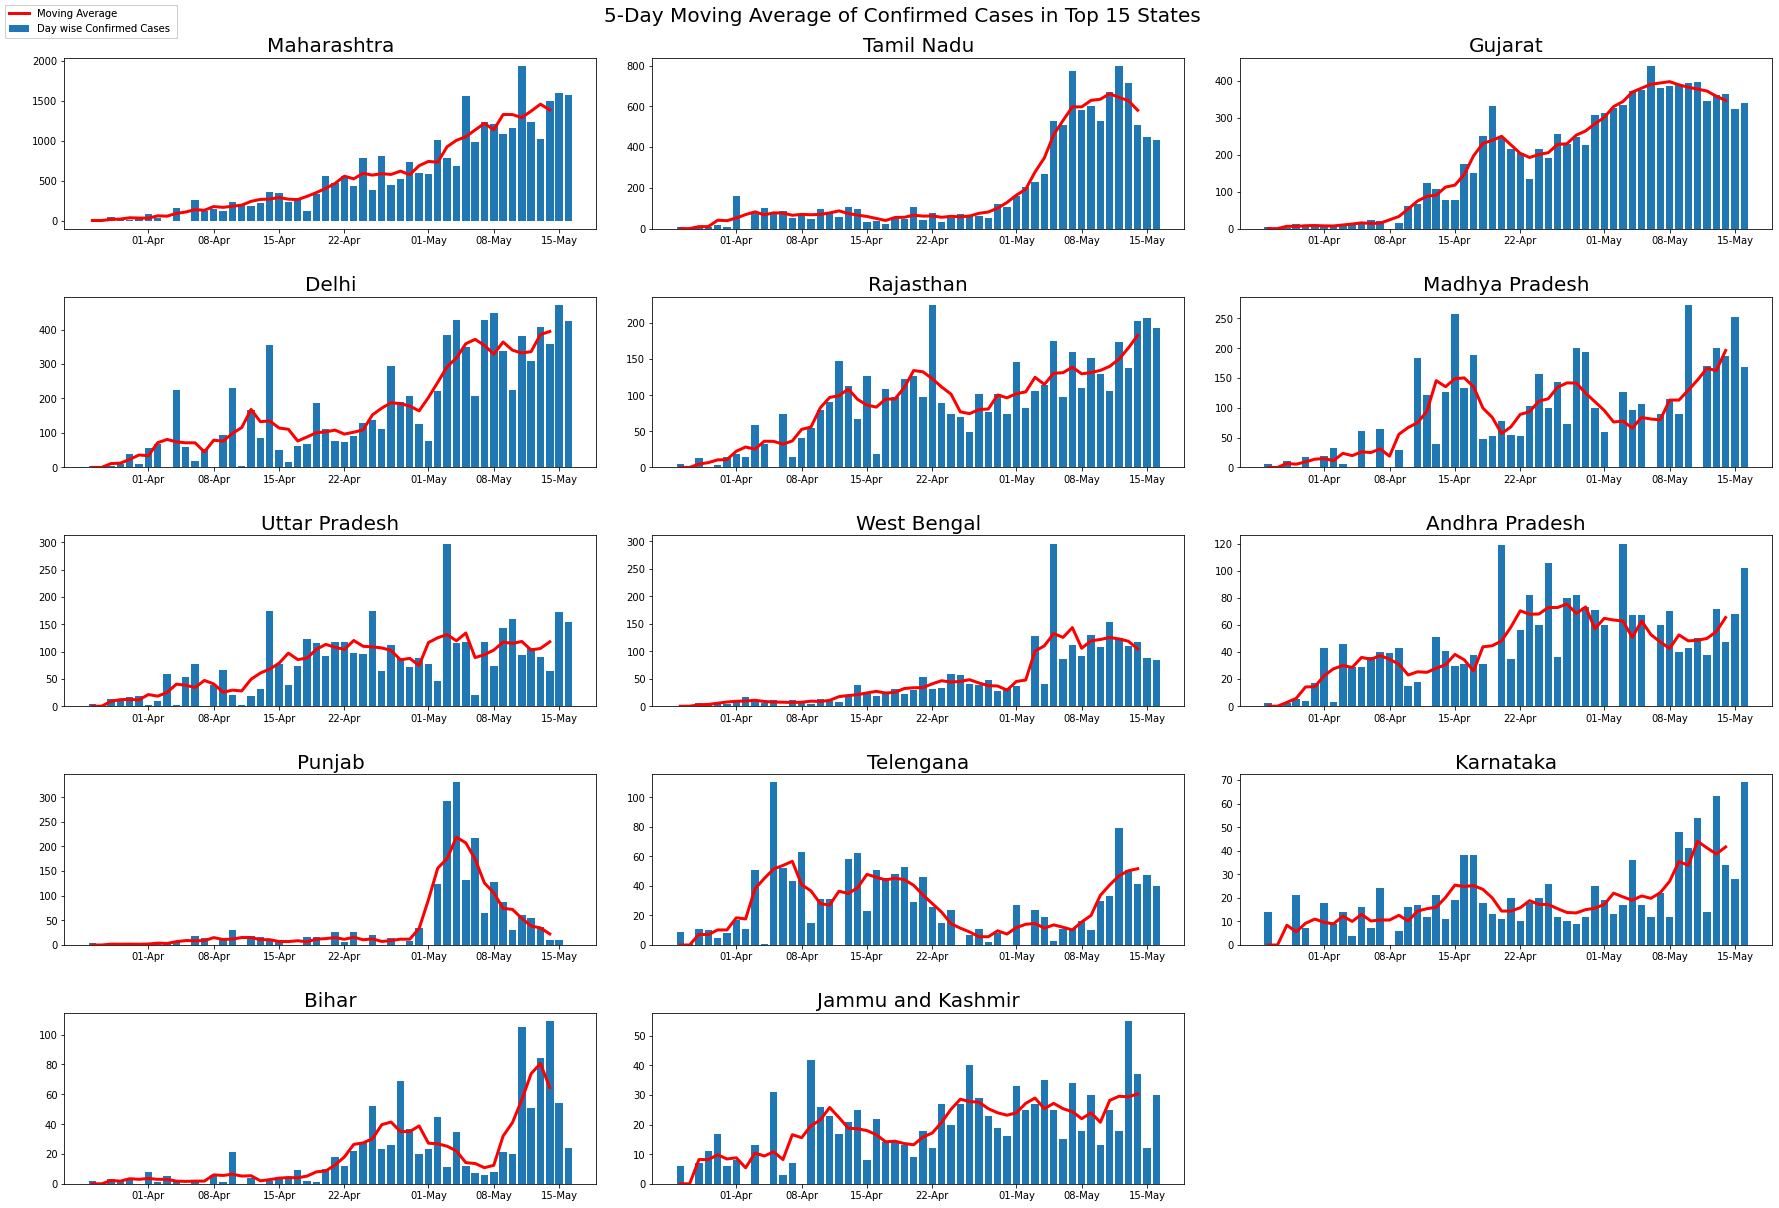

In [ ]:
#@title
all_state = list(india_covid_19['State/UnionTerritory'].unique())
all_state.remove('Unassigned')
#all_state.remove('Nagaland#')
#all_state.remove('Nagaland')
latest = india_covid_19[india_covid_19['Date'] > '24-03-20']
state_cases = latest.groupby('State/UnionTerritory')['Confirmed','Deaths','Cured'].max().reset_index()
latest['Active'] = latest['Confirmed'] - (latest['Deaths']- latest['Cured'])
state_cases = state_cases.sort_values('Confirmed', ascending= False).fillna(0)
states =list(state_cases['State/UnionTerritory'][0:15])

states_confirmed = {}
states_deaths = {}
states_recovered = {}
states_active = {}
states_dates = {}

for state in states:
    df = latest[latest['State/UnionTerritory'] == state].reset_index()
    k = []
    l = []
    m = []
    n = []
    for i in range(1,len(df)):
        k.append(df['Confirmed'][i]-df['Confirmed'][i-1])
        l.append(df['Deaths'][i]-df['Deaths'][i-1])
        m.append(df['Cured'][i]-df['Cured'][i-1])
        n.append(df['Active'][i]-df['Active'][i-1])
    states_confirmed[state] = k
    states_deaths[state] = l
    states_recovered[state] = m
    states_active[state] = n
    date = list(df['Date'])
    states_dates[state] = date[1:]
    
def calc_movingaverage(values ,N):    
    cumsum, moving_aves = [0], [0,0]
    for i, x in enumerate(values, 1):
        cumsum.append(cumsum[i-1] + x)
        if i>=N:
            moving_ave = (cumsum[i] - cumsum[i-N])/N
            moving_aves.append(moving_ave)
    return moving_aves

fig = plt.figure(figsize= (25,17))
plt.suptitle('5-Day Moving Average of Confirmed Cases in Top 15 States',fontsize = 20,y=1.0)
k=0
for i in range(1,15):
    ax = fig.add_subplot(5,3,i)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
    ax.bar(states_dates[states[k]],states_confirmed[states[k]],label = 'Day wise Confirmed Cases ') 
    moving_aves = calc_movingaverage(states_confirmed[states[k]],5)
    ax.plot(states_dates[states[k]][:-2],moving_aves,color='red',label = 'Moving Average',linewidth =3)  
    plt.title(states[k],fontsize = 20)
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper left')
    k=k+1
plt.tight_layout(pad=3.0)

*   Sudden rise in cases is seen in Tamil Nadu, Gujarat, Punjab, and Bihar.
---

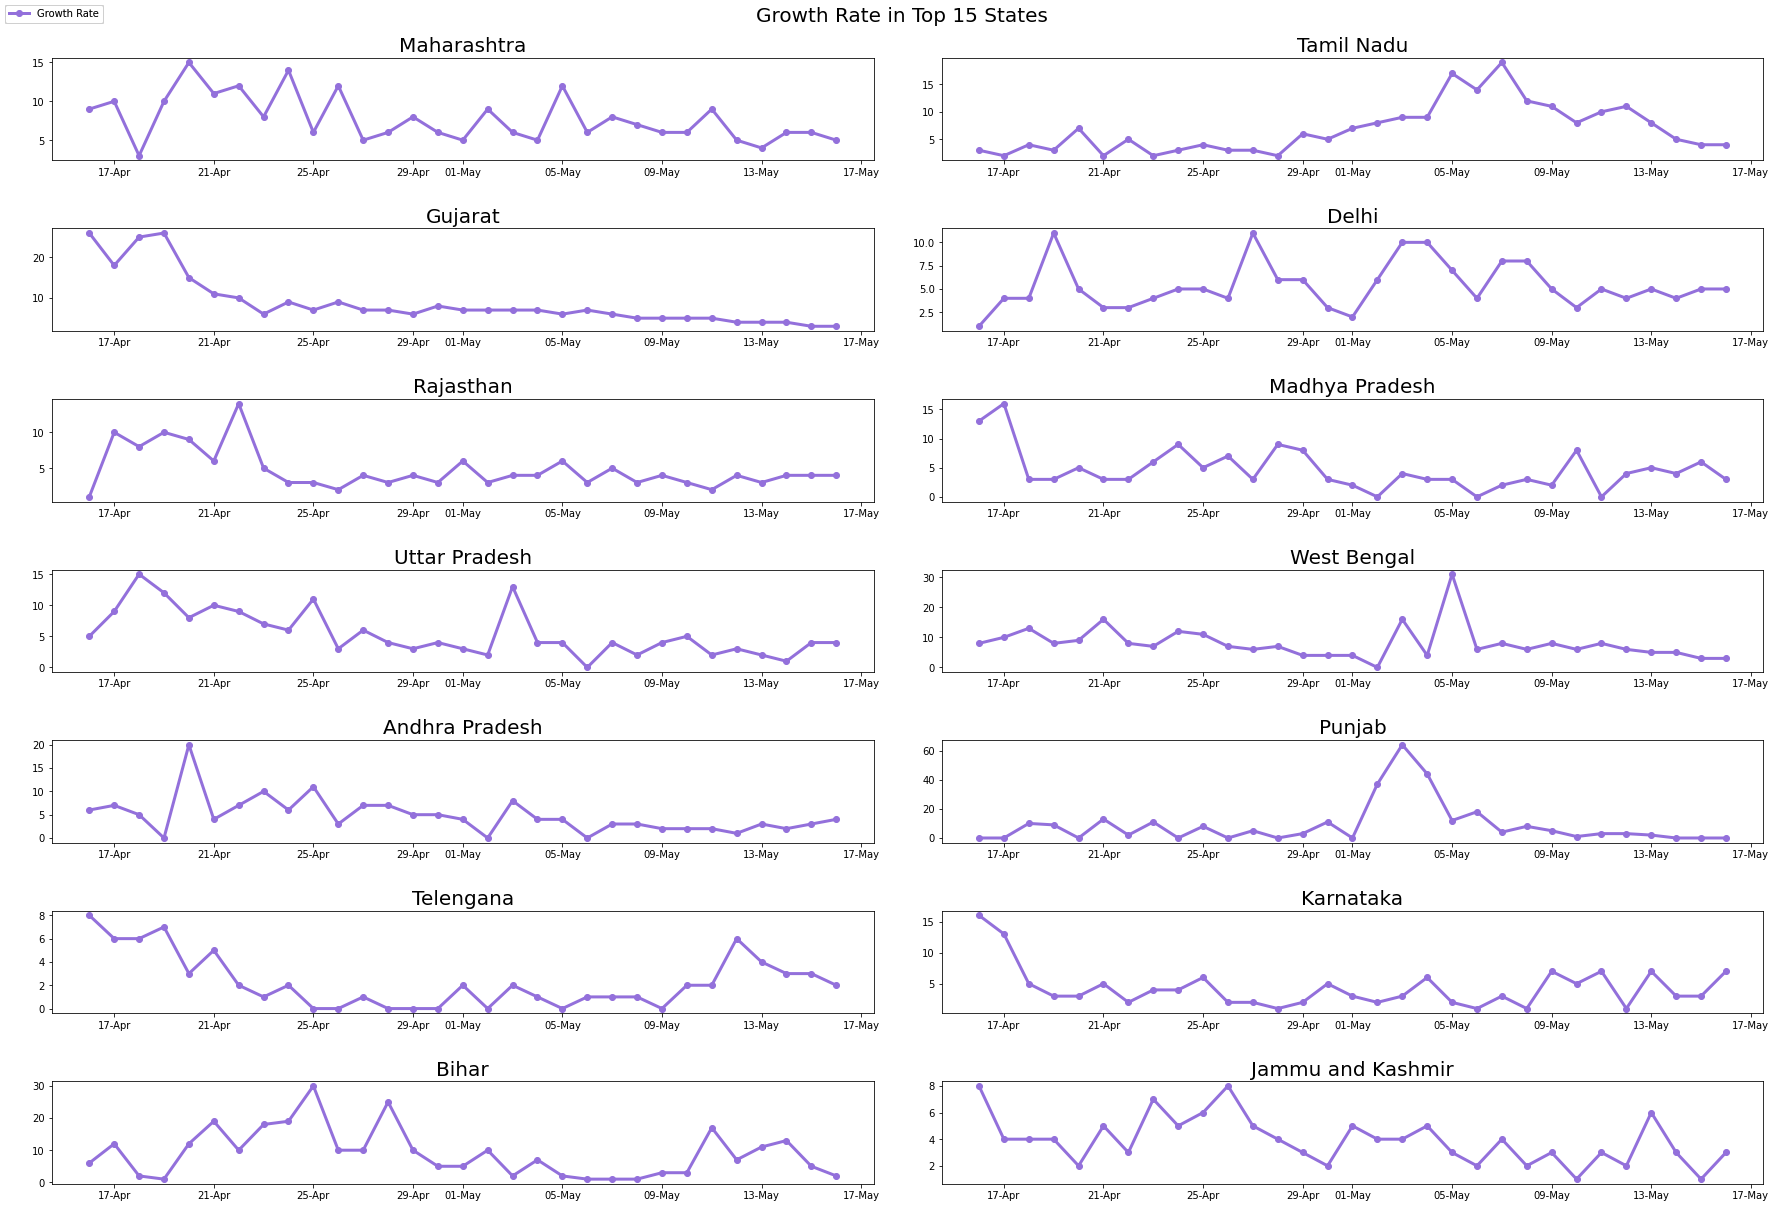

In [ ]:
#@title
def calc_growthRate(values):
    k = []
    for i in range(1,len(values)):
        summ = 0
        for j in range(i):
            summ = summ + values[j]
        rate = (values[i]/summ)*100
        k.append(int(rate))
    return k

fig = plt.figure(figsize= (25,17))
plt.suptitle('Growth Rate in Top 15 States',fontsize = 20,y=1.0)
k=0
for i in range(1,15):
    ax = fig.add_subplot(7,2,i)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
    #ax.bar(states_dates[states[k]],states_confirmed[states[k]],label = 'Day wise Confirmed Cases ') 
    growth_rate = calc_growthRate(states_confirmed[states[k]])
    ax.plot_date(states_dates[states[k]][21:],growth_rate[20:],color = '#9370db',label = 'Growth Rate',linewidth =3,linestyle='-')  
    plt.title(states[k],fontsize = 20)
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper left')
    k=k+1
plt.tight_layout(pad=3.0)

# **District-wise Analysis**

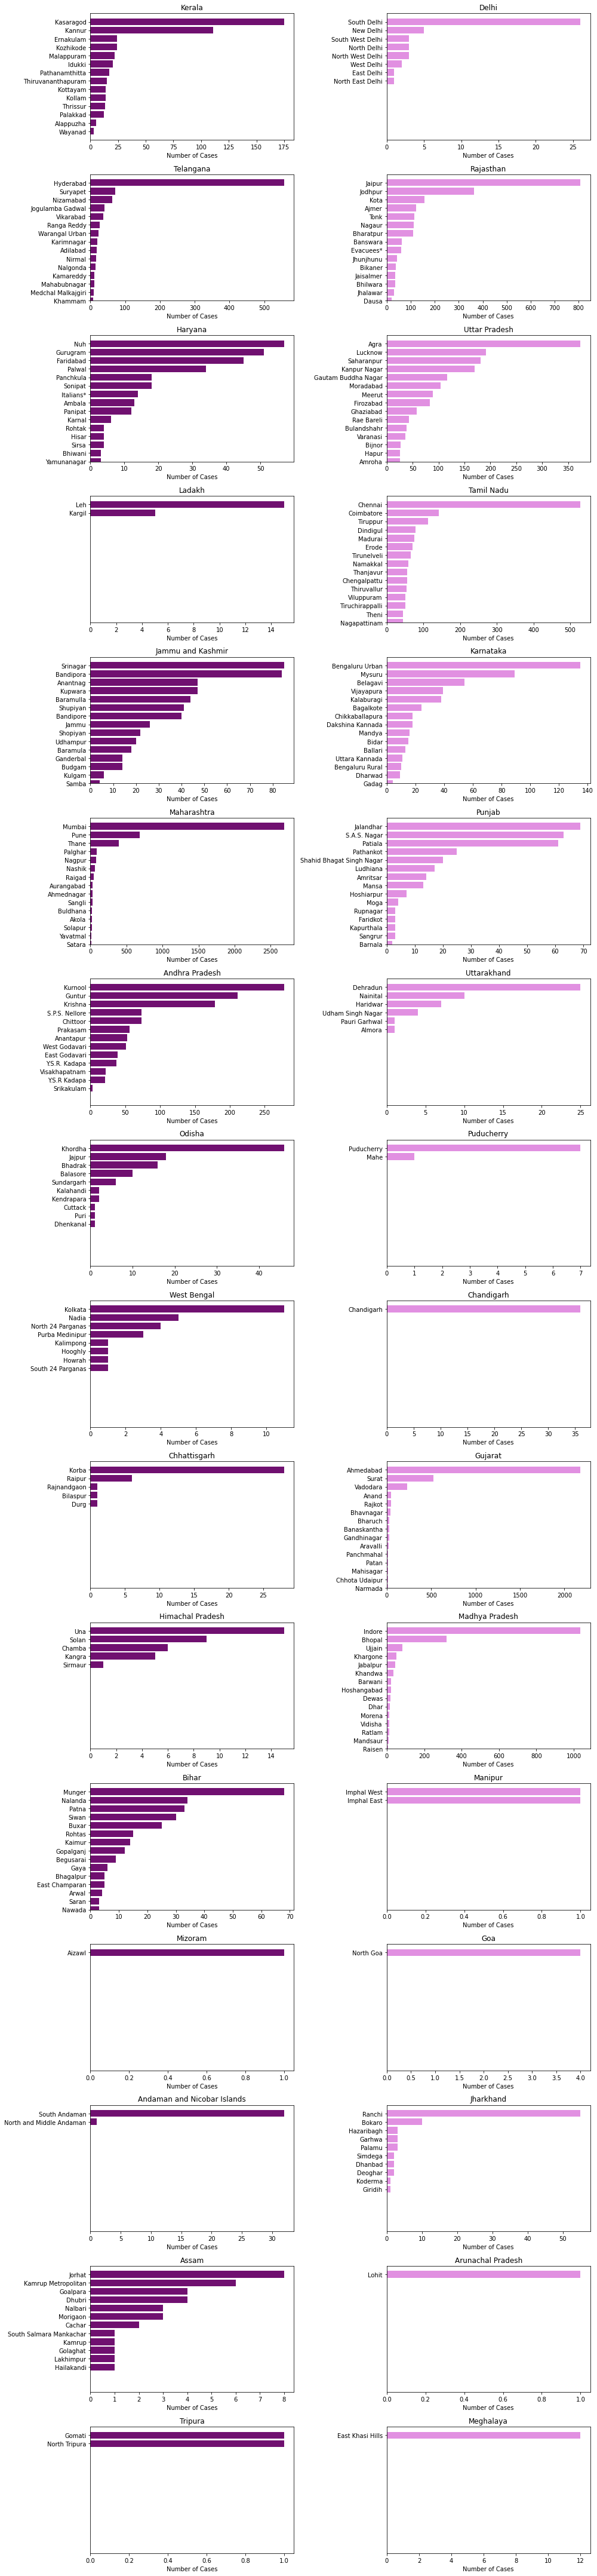

In [ ]:
#@title
colors_list = ['purple','violet']
states = individual_details['detected_state'].unique()
if len(states)%2==0:
    n_rows = int(len(states)/2)
else:
    n_rows = int((len(states)+1)/2)    
plt.figure(figsize=(14,60))

for idx,state in enumerate(states):    
    plt.subplot(n_rows,2,idx+1)
    y_order = individual_details[individual_details['detected_state']==state]['detected_district'].value_counts().index
    try:
        g = sns.countplot(data=individual_details[individual_details['detected_state']==state],y='detected_district',orient='v',color=colors_list[idx%2],order=y_order)
        plt.xlabel('Number of Cases')
        plt.ylabel('')
        plt.title(state)
        plt.ylim(14,-1)
    except:
        pass
plt.tight_layout()
plt.show()



*   The above data is from 30th January to 26th April 2020.
*   The cases by that time were little over 1000 cases.



---





# **Statewise Testing and Healthcare Insights**

In [ ]:
#@title
hospital_beds =hospital_beds.drop([36])
cols_object = list(hospital_beds.columns[2:8])

for cols in cols_object:
    hospital_beds[cols] = hospital_beds[cols].astype(int,errors = 'ignore')

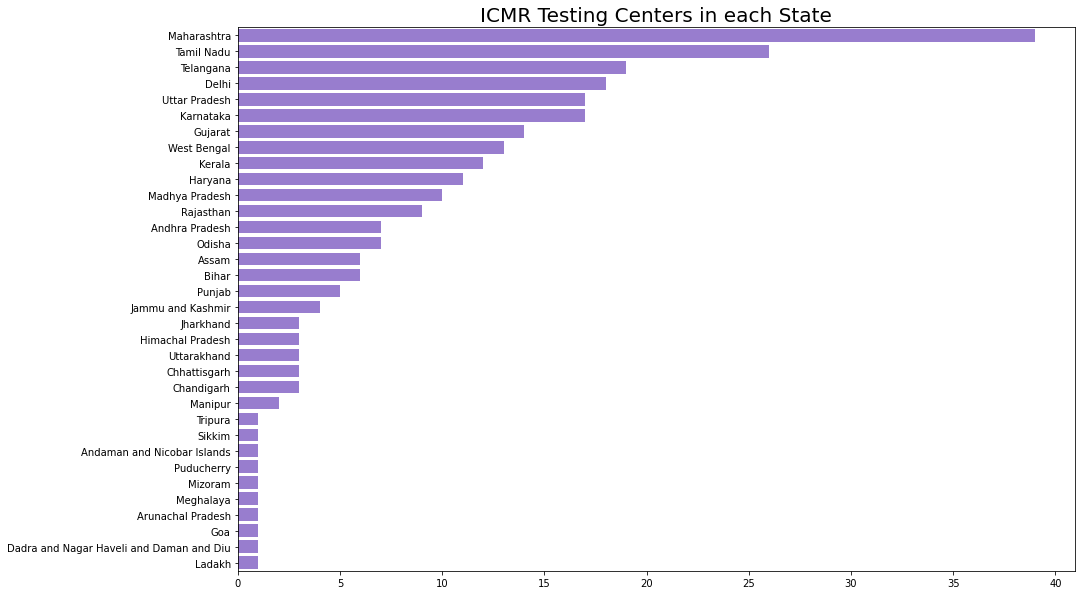

In [ ]:
#@title
values = list(ICMR_labs['state'].value_counts())
names = list(ICMR_labs['state'].value_counts().index)

plt.figure(figsize=(15,10))
sns.set_color_codes("pastel")
plt.title('ICMR Testing Centers in each State', fontsize = 20)
sns.barplot(x= values, y= names,color = '#9370db');



*   Maharashtra had the highest number of ICMR testing centres in the country.

---





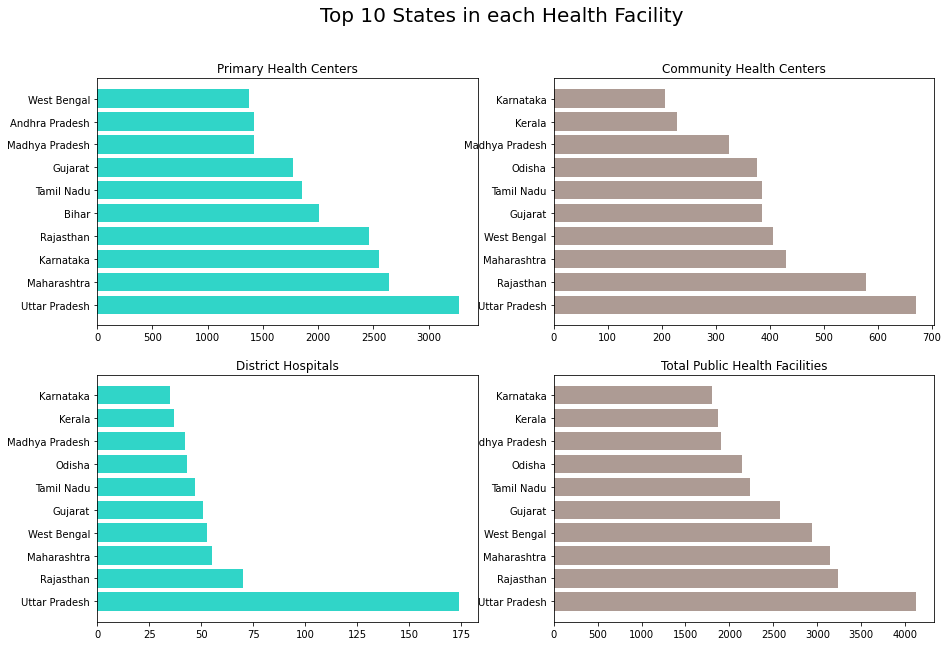

In [ ]:
#@title
top_10_primary = hospital_beds.nlargest(10,'NumPrimaryHealthCenters_HMIS')
top_10_community = hospital_beds.nlargest(10,'NumCommunityHealthCenters_HMIS')
top_10_district_hospitals = hospital_beds.nlargest(10,'NumDistrictHospitals_HMIS')
top_10_public_facility = hospital_beds.nlargest(10,'TotalPublicHealthFacilities_HMIS')
top_10_public_beds = hospital_beds.nlargest(10,'NumPublicBeds_HMIS')

plt.figure(figsize=(15,10))
plt.suptitle('Top 10 States in each Health Facility',fontsize=20)
plt.subplot(221)
plt.title('Primary Health Centers')
plt.barh(top_10_primary['State/UT'],top_10_primary['NumPrimaryHealthCenters_HMIS'],color ='#30D5C8');

plt.subplot(222)
plt.title('Community Health Centers')
plt.barh(top_10_community['State/UT'],top_10_community['NumCommunityHealthCenters_HMIS'],color = '#AD9B94');

plt.subplot(224)
plt.title('Total Public Health Facilities')
plt.barh(top_10_community['State/UT'],top_10_public_facility['TotalPublicHealthFacilities_HMIS'],color='#AD9B94');

plt.subplot(223)
plt.title('District Hospitals')
plt.barh(top_10_community['State/UT'],top_10_district_hospitals['NumDistrictHospitals_HMIS'],color = '#30D5C8');

Uttar Pradesh had the highest number of Primary, and Community Health centers as well as District and Public health facilities.

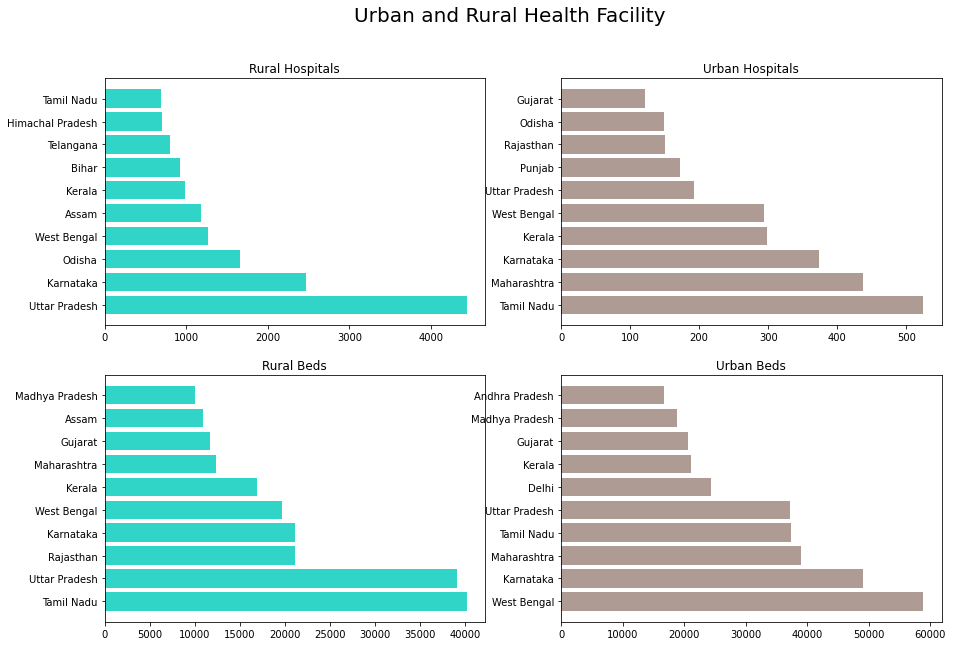

In [ ]:
#@title
top_rural_hos = hospital_beds.nlargest(10,'NumRuralHospitals_NHP18')
top_rural_beds = hospital_beds.nlargest(10,'NumRuralBeds_NHP18')
top_urban_hos = hospital_beds.nlargest(10,'NumUrbanHospitals_NHP18')
top_urban_beds = hospital_beds.nlargest(10,'NumUrbanBeds_NHP18')

plt.figure(figsize=(15,10))
plt.suptitle('Urban and Rural Health Facility',fontsize=20)
plt.subplot(221)
plt.title('Rural Hospitals')
plt.barh(top_rural_hos['State/UT'],top_rural_hos['NumRuralHospitals_NHP18'],color = '#30D5C8');

plt.subplot(222)
plt.title('Urban Hospitals')
plt.barh(top_urban_hos['State/UT'],top_urban_hos['NumUrbanHospitals_NHP18'],color = '#AD9B94');

plt.subplot(223)
plt.title('Rural Beds')
plt.barh(top_rural_beds['State/UT'],top_rural_beds['NumRuralBeds_NHP18'],color = '#30D5C8');

plt.subplot(224)
plt.title('Urban Beds')
plt.barh(top_urban_beds['State/UT'],top_urban_beds['NumUrbanBeds_NHP18'],color = '#AD9B94');



*   Tamil Nadu had the least number of rurak hospitals and Uttar Pradesh had the most but still both the states had almost same number of beds available.
*   Tamil Nadu had the most number of urban beds.


---




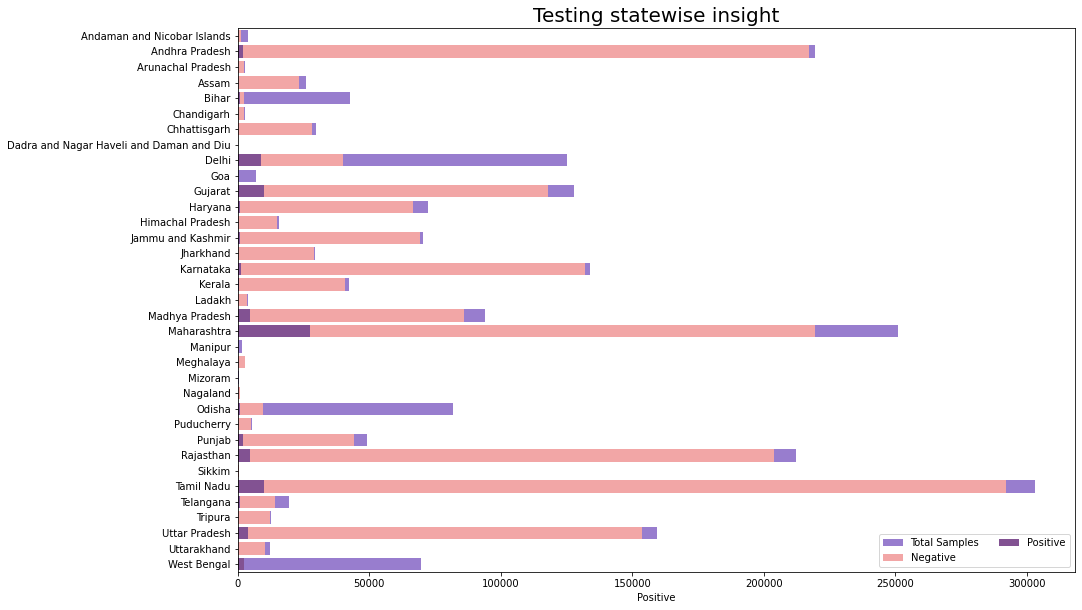

In [ ]:
#@title
state_test = pd.pivot_table(state_testing, values=['TotalSamples','Negative','Positive'], index='State', aggfunc='max')
state_names = list(state_test.index)
state_test['State'] = state_names

plt.figure(figsize=(15,10))
sns.set_color_codes("pastel")
sns.barplot(x="TotalSamples", y= state_names, data=state_test,label="Total Samples", color = '#9370db')
sns.barplot(x='Negative', y=state_names, data=state_test,label='Negative', color= '#ff9999')
sns.barplot(x='Positive', y=state_names, data=state_test,label='Positive', color='#87479d')
plt.title('Testing statewise insight',fontsize = 20)
plt.legend(ncol=2, loc="lower right", frameon=True);







*   Most testings were done in Tamil Nadu followed by Maharashtra and Andhra Pradesh.
*   The visualisation is based on data of April.
*   Majority of samples were negative.

---







The data was extracted from https://data.covid19india.org/ .

---

